In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [2]:
im = cv2.imread('minarepak.jpg')

In [3]:
zoom_factor = 2

In [4]:
zoomed_im = cv2.resize(im, None, fx=zoom_factor, fy=zoom_factor)  
center = (len(zoomed_im)//2, len(zoomed_im[0])//2)
size = (900,1440)
cropped_im = zoomed_im[center[0]-size[0]//2: center[0]+size[0]//2, center[1]-size[1]//2: center[1]+size[1]//2]

In [11]:

vid = cv2.VideoCapture(0)
dist = 0
x_delta = 0
dist_buffer = []
x_delta_buffer = []
buffer_len = 5
while(True):
    
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,100,255, cv2.THRESH_BINARY)[1]
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#     print(cnts)
    
    
    for c in cnts:
        cv2.drawContours(frame, [c], -1, (36, 255, 12), 2)
#     print(len(cnts))
    if len(cnts) == 2:
        x1, y1 = cnts[0][0][0][0],cnts[0][0][0][1]
        x2, y2 = cnts[1][0][0][0],cnts[1][0][0][1]
        dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        center_x = (x1 + x2)//2
        x_delta = center_x - len(frame[0])//2
        dist_buffer.append(dist)
        if len(dist_buffer) >=buffer_len:
            dist = sum(dist_buffer[-buffer_len:]) / buffer_len
            dist_buffer = dist_buffer[-buffer_len:]
            
            
        x_delta_buffer.append(x_delta)
        if len(x_delta_buffer) >=buffer_len:
            x_delta = sum(x_delta_buffer[-buffer_len:]) // buffer_len

            x_delta_buffer = x_delta_buffer[-buffer_len:]
        
    if dist != 0:
        zoom_factor = 2 - dist/300
    else:
        zoom_factor = 5
    
    print(x_delta)
    zoomed_im = cv2.resize(im, None, fx=zoom_factor, fy=zoom_factor)  
    center = (len(zoomed_im)//2, len(zoomed_im[0])//2 + x_delta)
    size = (900,1440)
    cropped_im = zoomed_im[center[0]-size[0]//2: center[0]+size[0]//2, center[1]-size[1]//2: center[1]+size[1]//2]

    clear_output(wait=True)
    cv2.imshow('window', cropped_im)
    cv2.imshow('ir', thresh)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

error: OpenCV(4.7.0) /io/opencv/modules/highgui/src/window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [12]:
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

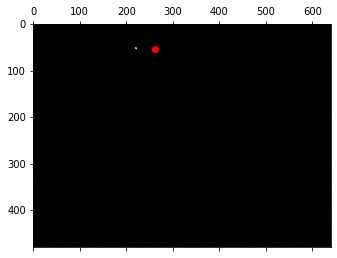

In [52]:
plt.matshow(frame)
idx = 0
c = cnts[0]
plt.plot(c[idx][0][0],c[idx][0][1] , 'ro')

In [105]:
import pygame
import random


WIDTH = 360*2
HEIGHT = 480*2
FPS = 30

# Define Colors 
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

## initialize pygame and create window
pygame.init()
pygame.mixer.init()  ## For sound
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("<Your game>")
clock = pygame.time.Clock()     ## For syncing the FPS



vid = cv2.VideoCapture(0)


dist = 60
grad = 0
running = True
while running:

    #1 Process input/events
    clock.tick(FPS)     ## will make the loop run at the same speed all the time
    for event in pygame.event.get():        # gets all the events which have occured till now and keeps tab of them.
        ## listening for the the X button at the top
        if event.type == pygame.QUIT:
            running = False


    #3 Draw/render
    screen.fill(BLACK)
    
    
    ret, frame = vid.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,200,255, cv2.THRESH_BINARY)[1]
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#     print(cnts)
    
    
#     for c in cnts:
#         cv2.drawContours(frame, [c], -1, (36, 255, 12), 2)
#     print(len(cnts))
    if len(cnts) == 2:
        x1, y1 = cnts[0][0][0][0],cnts[0][0][0][1]
        x2, y2 = cnts[1][0][0][0],cnts[1][0][0][1]
        dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        grad = ((y2-y1) / (x2-x1))
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    print(grad)
    
    size = WIDTH - 60 - dist*2
    pygame.draw.rect(screen, (255,0,0), pygame.Rect(WIDTH//2 - size//2, HEIGHT//2 - size//2, size, size))
    screen.blit(pygame.transform.rotate(screen, 180*grad),(0,0))

    
    pygame.display.flip()       

pygame.quit()
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

0
0
0
0
0
0
0
0
0
0
0
0.13963963963963963
0.16143497757847533
0.18018018018018017
0.19282511210762332
0.2072072072072072
0.22624434389140272
0.24545454545454545
0.2579185520361991
0.2727272727272727
0.2785388127853881
0.25688073394495414
0.2119815668202765
0.14814814814814814
0.07272727272727272
0.0136986301369863
-0.04484304932735426
-0.08597285067873303
-0.12272727272727273
-0.1643835616438356
-0.19907407407407407
-0.24299065420560748
-0.2796208530805687
-0.32057416267942584
-0.35609756097560974
-0.38349514563106796
-0.4068627450980392
-0.42786069651741293
-0.43842364532019706
-0.4504950495049505
-0.4626865671641791
-0.47738693467336685
-0.49743589743589745
-0.5233160621761658
-0.5555555555555556
-0.5882352941176471
-0.6129032258064516
-0.6378378378378379
-0.6648351648351648
-0.6833333333333333
-0.6927374301675978
-0.6983240223463687
-0.6966292134831461
-0.6519337016574586
-0.5891891891891892
-0.5161290322580645
-0.42328042328042326
-0.3248730964467005
-0.23529411764705882
-0.1483253

In [101]:
pygame.quit()
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [34]:
print(c[2][0])

[221  54]


In [27]:
frame[c[1][0]]

array([[[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]]], dtype=uint8)